## <font color='darkblue'>進行資料前處理 (Preprocess) </font>

### STEP1. 資料讀取與轉換 

In [1]:
from keras.datasets import mnist  
from keras.utils import np_utils  
from matplotlib import pyplot as plt
import numpy as np
import os
import matplotlib
np.random.seed(10)  

#######################################################
# Constant
#######################################################
DATA_SOURCES = 'datas\mnist'
SERIALIZED_MODEL_NAME = 'keras_mnist_cnn.h5'
USE_SM_IF_EXIST = False


#######################################################
# Main
#######################################################
# Read MNIST data  
(X_Train, y_Train), (X_Test, y_Test) = mnist.load_data()  
  
# Translation of data  
X_Train40 = X_Train.reshape(X_Train.shape[0], 28, 28, 1).astype('float32')  
X_Test40 = X_Test.reshape(X_Test.shape[0], 28, 28, 1).astype('float32')


# Save mnist into file system and load one back for reference
'''
pc = 0
for i in range(1, y_Train.shape[0]+1):
    fp = os.path.join(DATA_SOURCES, 'mnist_{}_{}.jpg'.format(i, y_Train[i-1]))
    #print("Save {}...".format(fp))
    matplotlib.image.imsave(fp, X_Train[i-1], cmap='binary')
    pc += 1
    if pc == 100:
        break

'''

Using TensorFlow backend.


'\npc = 0\nfor i in range(1, y_Train.shape[0]+1):\n    fp = os.path.join(DATA_SOURCES, \'mnist_{}_{}.jpg\'.format(i, y_Train[i-1]))\n    #print("Save {}...".format(fp))\n    matplotlib.image.imsave(fp, X_Train[i-1], cmap=\'binary\')\n    pc += 1\n    if pc == 100:\n        break\n\n'

Evaluation on the data set to see how they look like:

In [4]:
print(X_Train.__class__)  # Image was saved in numpy
X_Train.shape             # We got 60000 28x28 image files

<class 'numpy.ndarray'>


(60000, 28, 28)

In [5]:
X_Train[0]  # What an image look like in numpy
for i in range(28):
    line = ''
    for j in range(28):
        line += "{: >3d} ".format(X_Train[0][i, j])
        
    print(line)

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

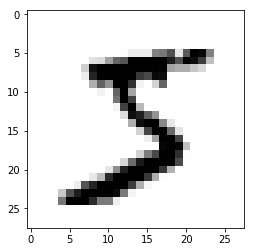

In [6]:
# How it look like in image
from matplotlib import pyplot as plt

plt.imshow(X_Train[0], cmap='binary')

### STEP2. 將 Features 進行標準化與 Label 的 Onehot encoding 

In [7]:
# Standardize feature data  
X_Train40_norm = X_Train40 / 255  
X_Test40_norm = X_Test40 /255  
  
# Label Onehot-encoding  
y_TrainOneHot = np_utils.to_categorical(y_Train)  
y_TestOneHot = np_utils.to_categorical(y_Test)  

Data evaluation

In [8]:
# (60000, 10)
# Total 60000 records with each record composed of 10 number with only one as 1 and the rest as 0
print("y_TrainOneHot.shape={}".format(y_TrainOneHot.shape))

y_TrainOneHot[:10]  # Show top 10 records

y_TrainOneHot.shape=(60000, 10)


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## <font color='darkblue'>建立模型</font>

### STEP1. 建立卷積層與池化層

In [9]:
from keras.models import Sequential  
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.models import load_model
  
model = Sequential()  
# Create CN layer 1  
model.add(Conv2D(filters=16,  
                 kernel_size=(5,5),  
                 padding='same',  
                 input_shape=(28,28,1),  
                 activation='relu'))  
# Create Max-Pool 1  
model.add(MaxPooling2D(pool_size=(2,2)))  
  
# Create CN layer 2  
model.add(Conv2D(filters=36,  
                 kernel_size=(5,5),  
                 padding='same',  
                 input_shape=(28,28,1),  
                 activation='relu'))  
  
# Create Max-Pool 2  
model.add(MaxPooling2D(pool_size=(2,2)))  
  
# Add Dropout layer  
model.add(Dropout(0.25))  

### STEP2. 建立神經網路 

In [10]:
# 建立平坦層
model.add(Flatten())

# 建立 Hidden layer
model.add(Dense(128, activation='relu'))  
model.add(Dropout(0.5))  

# 建立輸出層
model.add(Dense(10, activation='softmax'))

### STEP3. 查看模型的摘要

In [11]:
model.summary()  
print("")  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

## <font color='darkblue'>進行訓練</font>

### STEP1. 定義訓練並進行訓練 

In [12]:
# 定義訓練方式  
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
  
# 開始訓練 
if os.path.isfile(SERIALIZED_MODEL_NAME) and USE_SM_IF_EXIST:
    model = load_model(SERIALIZED_MODEL_NAME)
else:
    train_history = model.fit(x=X_Train40_norm,  
                              y=y_TrainOneHot, validation_split=0.2,  
                              epochs=10, batch_size=300, verbose=2) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 59s - loss: 0.4906 - acc: 0.8468 - val_loss: 0.0965 - val_acc: 0.9723
Epoch 2/10
 - 60s - loss: 0.1412 - acc: 0.9585 - val_loss: 0.0634 - val_acc: 0.9803
Epoch 3/10
 - 59s - loss: 0.1029 - acc: 0.9691 - val_loss: 0.0529 - val_acc: 0.9832
Epoch 4/10
 - 59s - loss: 0.0842 - acc: 0.9751 - val_loss: 0.0462 - val_acc: 0.9854
Epoch 5/10
 - 60s - loss: 0.0720 - acc: 0.9782 - val_loss: 0.0391 - val_acc: 0.9881
Epoch 6/10
 - 58s - loss: 0.0639 - acc: 0.9808 - val_loss: 0.0387 - val_acc: 0.9887
Epoch 7/10
 - 59s - loss: 0.0565 - acc: 0.9832 - val_loss: 0.0405 - val_acc: 0.9878
Epoch 8/10
 - 60s - loss: 0.0516 - acc: 0.9844 - val_loss: 0.0333 - val_acc: 0.9900
Epoch 9/10
 - 61s - loss: 0.0453 - acc: 0.9867 - val_loss: 0.0337 - val_acc: 0.9897
Epoch 10/10
 - 61s - loss: 0.0420 - acc: 0.9869 - val_loss: 0.0342 - val_acc: 0.9902


### STEP3. Serialized Model for future usage

In [13]:
model.save(SERIALIZED_MODEL_NAME)

### STEP4. 畫出 accuracy 執行結果

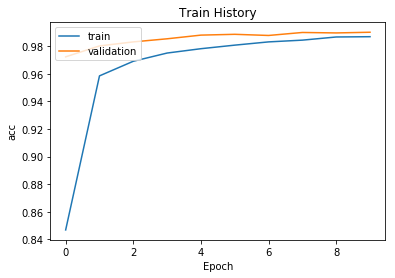

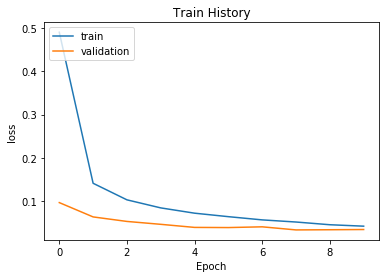

In [18]:
from utils import *  

show_train_history(train_history, 'acc', 'val_acc')  
show_train_history(train_history, 'loss', 'val_loss')

### STEP5. 使用小畫家的圖檔進行測試

Original data:


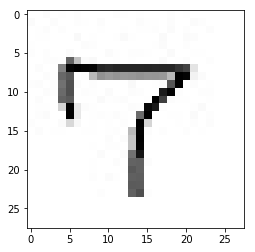

In [19]:
img_data = matplotlib.pyplot.imread('datas/my_7.jpg')

print('Original data:')
plt.imshow(img_data, cmap='binary')

Transformed data:


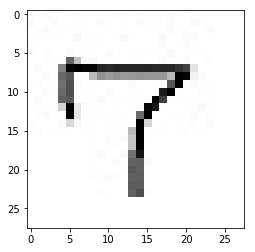

In [20]:
img_mnist_fmt = np.zeros((28, 28))
for i in range(28):
    for j in range(28):        
        img_mnist_fmt[i, j] =255 - int(np.mean(img_data[i, j][:3]))
        
print('Transformed data:')
plt.imshow(img_mnist_fmt, cmap='binary')

In [36]:
input_fmt = img_mnist_fmt.reshape(1, 28, 28, 1).astype('float32') / 255
print('input_fmt.shape={}'.format(input_fmt.shape))
print('The prediction of my data is {}'.format(model.predict_classes(input_fmt)[0]))

input_fmt.shape=(1, 28, 28, 1)
The prediction of my data is 7


## <font color='darkblue'>評估模型準確率與進行預測</font>

### STEP1. 評估模型準確率 

In [38]:
scores = model.evaluate(X_Test40_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  

10000/10000 [==============================] - 3s 275us/step

	[Info] Accuracy of testing data = 99.0%


### STEP2. 預測結果 

In [40]:
print("\t[Info] Making prediction of X_Test4D_norm")  
prediction = model.predict_classes(X_Test40_norm)  # Making prediction and save result to prediction  
print()  
print("\t[Info] Show 10 prediction result (From 240):")  
print("%s\n" % (prediction[240:250]))  

	[Info] Making prediction of X_Test4D_norm

	[Info] Show 10 prediction result (From 240):
[5 9 8 7 2 3 0 4 4 2]



### STEP3. 顯示前 10 筆預測結果 

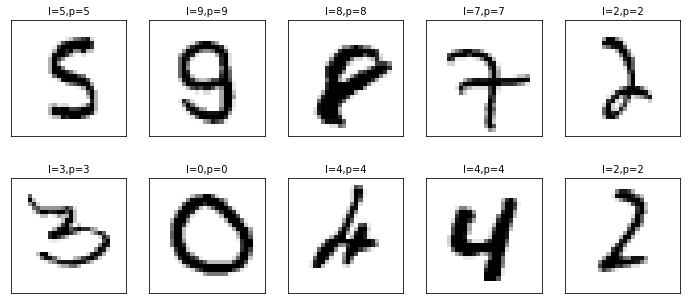

In [41]:
plot_images_labels_predict(X_Test, y_Test, prediction, idx=240)  

### STEP4. 顯示 Confusion Matrix 

In [42]:
import pandas as pd  
print("\t[Info] Display Confusion Matrix:")  
print("%s\n" % pd.crosstab(y_Test, prediction, rownames=['label'], colnames=['predict'])) 

	[Info] Display Confusion Matrix:
predict    0     1     2     3    4    5    6     7    8    9
label                                                        
0        976     1     0     0    0    0    2     1    0    0
1          0  1130     1     1    0    1    0     1    1    0
2          1     4  1021     0    1    0    0     5    0    0
3          0     0     0  1003    0    3    0     2    2    0
4          0     0     0     0  979    0    1     0    0    2
5          1     0     0     6    0  881    2     0    0    2
6          5     2     0     0    2    1  948     0    0    0
7          0     1     3     3    0    0    0  1019    1    1
8          4     1     3     2    1    1    0     2  953    7
9          1     4     1     1    6    1    0     3    0  992



## <font color='darkblue'>Supplement</font>
* [THE MNIST DATABASE](http://yann.lecun.com/exdb/mnist/)
* [From image files to Numpy Arrays](https://www.kaggle.com/lgmoneda/from-image-files-to-numpy-arrays)
* [Saving a Numpy array as an image](https://stackoverflow.com/questions/902761/saving-a-numpy-array-as-an-image)
* [DAY17 Mnist資料集](https://ithelp.ithome.com.tw/articles/10195884)